In [69]:
import random
from typing import Dict, List, TypedDict, NotRequired
from langgraph.graph import StateGraph, START, END

In [70]:
class AgentState(TypedDict):  
    name: str
    numbers: NotRequired[List[int]]  
    counter: NotRequired[int]

In [71]:
def greeting_node(state: AgentState) -> AgentState:
    """ 
    Greeting Node which says hi to the person
    """
    return {
        **state,
        "name": f'Hi there, {state["name"]}',
        "counter" : 0
    }
    
    
def random_node(state: AgentState) -> AgentState:
    """ 
    Generates a random number from 0 to 10 
    """
    return {
        **state,
        "counter" : state.get("counter", 0) + 1,
        "numbers" : state.get("numbers", []) + [random.randint(0,10)] if state.get("counter", 0) > 0 else []
    }
    

def should_continue(state: AgentState) -> str:
    """ 
    Function to decide what to do next
    """
    
    if state.get("counter", 0) <= 5:
        print("Entering Loop", state.get("counter", 0))
        return "loop" 
    else:
        return "exit"

In [ ]:
graph = StateGraph(AgentState)

graph.add_node("greeter", greeting_node)
graph.add_node("random", random_node)

graph.add_edge("greeter", "random")

graph.add_edge(START, 'greeter')


graph.add_conditional_edges(
        "random",
        should_continue,
        {
            "loop" : "random",
            "exit" : END
        }
)


graph.set_entry_point("greeter")


In [73]:
app =  graph.compile()
result =  app.invoke({
    "name" : "Vihanga"
})

print(result)

Entering Loop 1
Entering Loop 2
Entering Loop 3
Entering Loop 4
Entering Loop 5
{'name': 'Hi there, Vihanga', 'numbers': [6, 1, 3, 4, 7], 'counter': 6}


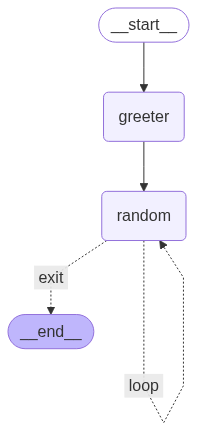

In [74]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))